Notebook to investigate the spin texture of WSM-metal systems

In [2]:
import weyl_spins as ws
import weyl_green as wg
%load_ext autoreload
%autoreload 2

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("white")
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Preliminary plots

First, get a feel for the system we'll be working with:

In [446]:
size=100
res=100
ks,es,vs=ws.Spectrum(size=size,kz=0,t=1,g=0,mu=-4,r=2.3,bulk=0,return_loc=False)

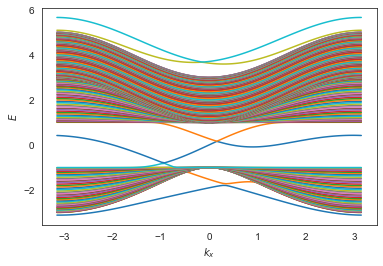

In [447]:
plt.plot(ks,es)
plt.xlabel(r"$k_x$")
plt.ylabel(r"$E$")
plt.show()

Plot wrt $k_z$:

In [275]:
size=100
ks_z,es_z,vs_z=ws.SpectrumZ(size=size,kx=0,t=1,g=0,mu=-4,r=2.3,bulk=0)

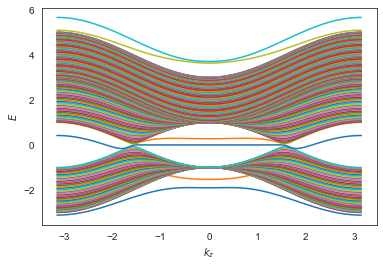

In [276]:
plt.plot(ks_z,es_z)
plt.xlabel(r"$k_z$")
plt.ylabel(r"$E$")
# plt.xlim(-2,2)
# plt.ylim(-1,1)
plt.show()

In [277]:
size=100

kxs = np.linspace(-0.5,0.5,5)
es_5 = np.zeros((100,200,5))

for i in range(5):
    kx = kxs[i]
    ks_z,es_z,vs_z=ws.SpectrumZ(size=size,kx=kx,t=1,g=0,mu=-4,r=2.3,bulk=0)
    es_5[:,:,i] = es_z

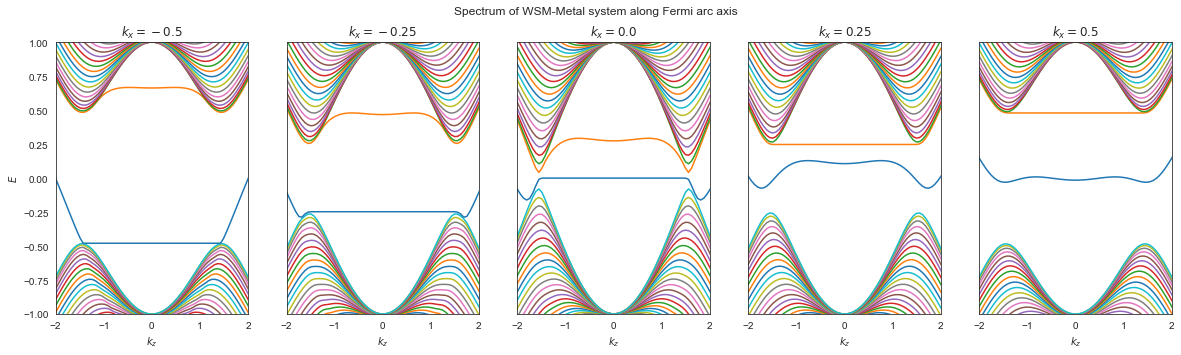

In [278]:
fig,ax=plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(20,5))

plt.suptitle("Spectrum of WSM-Metal system along Fermi arc axis")

for i in range(5):
    ax[i].plot(ks_z,es_5[:,:,i])
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-1,1)
    ax[i].set_xlabel(r"$k_z$")
    ax[i].set_title(r"$k_x = {}$".format(kxs[i]))
ax[0].set_ylabel(r"$E$")

plt.show()

# Spins of boundary states

From our work with spectral functions, we know that the fledgling states are localized to the edges:

From the left:

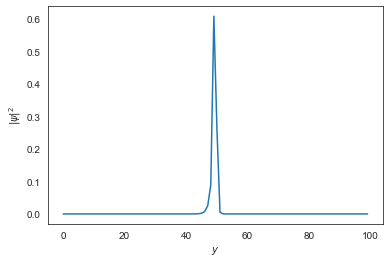

In [457]:
# get index of state with energy closest to 0 at kx = -pi
bdry_idx = np.argmin(np.abs(es[0,:]))
# get state
state = vs[:,bdry_idx,0]

plt.plot(np.arange(100),ws.SumOverSpins(state))
plt.xlabel(r"$y$")
plt.ylabel(r"$|\psi|^2$")
plt.show()

In [458]:
spinX,spinY,spinZ=ws.Spin(state,size)
print("<sigma_x>={}".format(spinX))
print("<sigma_y>={}".format(spinY))
print("<sigma_z>={}".format(spinZ))

<sigma_x>=0.0728721050878347
<sigma_y>=0.0
<sigma_z>=0.9403938607909924


From the right:

In [284]:
# get index of state with energy closest to 0 at kx = pi
bdry_idx = np.argmin(np.abs(es[-1,:]))
# get state
state = vs[:,bdry_idx,-1]

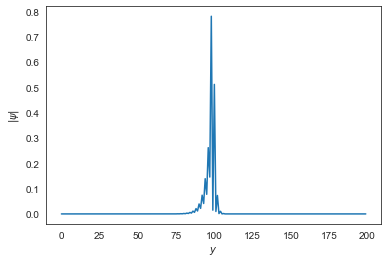

In [286]:
plt.plot(np.arange(2*size),np.abs(state))
plt.xlabel(r"$y$")
plt.ylabel(r"$|\psi|$")
plt.show()

In [287]:
spinX,spinY,spinZ=ws.Spin(state,size)
print("<sigma_x>={}".format(spinX))
print("<sigma_y>={}".format(spinY))
print("<sigma_z>={}".format(spinZ))

<sigma_x>=0.07287210508783615
<sigma_y>=0.0
<sigma_z>=0.940393860790992


Near the middle:

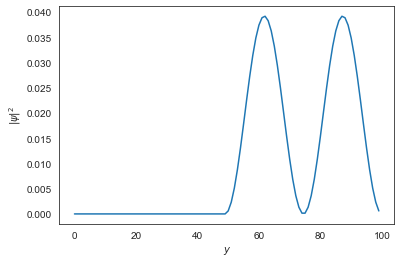

In [426]:
# get index of state with energy closest to 0 at kx = 0
bdry_idx = np.argmin(np.abs(es[50,:]))
# get state
state = vs[:,103,50]

plt.plot(np.arange(100),ws.SumOverSpins(state))
plt.xlabel(r"$y$")
plt.ylabel(r"$|\psi|^2$")
plt.show()

In [427]:
spinX,spinY,spinZ=ws.Spin(state,size)
print("<sigma_x>={}".format(spinX))
print("<sigma_y>={}".format(spinY))
print("<sigma_z>={}".format(spinZ))

<sigma_x>=5.538367627453862e-18
<sigma_y>=0.0
<sigma_z>=0.9999999999999998


# Spin texture

Look at the $k_x,k_z$ dependency as we sweep the first Brillouin zone. It seems like $<\sigma_y>=0$ always, so focus on the interplay between $\sigma_x$ and $\sigma_z$. First, a simple colormap of $<\sigma_x>$:

In [194]:
SX,SY,SZ=ws.SpinMap(size=20,res=100,t=1,g=0,mu=-2,r=0.)

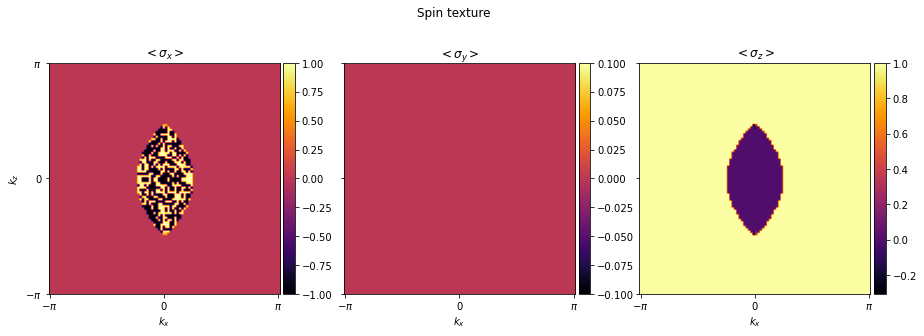

In [195]:
fig,ax=plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(15,5))

plt.suptitle("Spin texture")

im0 = ax[0].imshow(SX,cmap='inferno')
ax[0].set_title(r"$<\sigma_x>$")
ax[0].set_ylabel(r"$k_z$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(SY,cmap='inferno')
ax[1].set_title(r"$<\sigma_y>$")

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[2].imshow(SZ,cmap='inferno')
ax[2].set_title(r"$<\sigma_z>$")

divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

for i in range(3):
    ax[i].set_ylim(0,res)
    ax[i].set_yticks([0,int(res/2),res])
    ax[i].set_yticklabels(["$-\pi$","0","$\pi$"])
    ax[i].set_xticks([0,int(res/2)-1/2,res-1])
    ax[i].set_xticklabels(["$-\pi$","0","$\pi$"])
    ax[i].set_xlabel(r"$k_x$")

plt.show()

The fuzziness in $<\sigma_x> = \pm 1$ is due to how we choose our "boundary" state. For $r=0$, there is a double degeneracy on the Fermi arc, and thus, the energies are theoretically equal (computer precision misses that). We could give it a nudge in the algorithm to force it to pick one energy over the other. 

Check that they square to 1

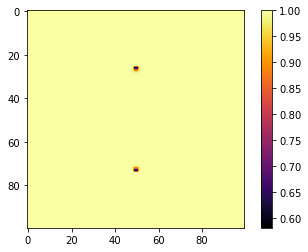

In [196]:
plt.imshow(SX**2+SZ**2,cmap="inferno")
plt.colorbar()
plt.show()

How does this match up to where the topological regions are? Take $\omega = 0$ to probe eigenenergies

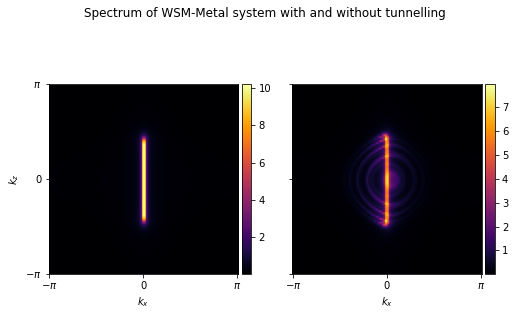

In [554]:
size=20
res=100

As_0 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-np.pi,np.pi,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.SpectralFunctionWeylKK(size=size,res=res,kx=kx,w=0,t=1,g=0,mu=-2,r=0,spin=0)
    As_23[:,i] = wg.SpectralFunctionWeylKK(size=size,res=res,kx=kx,w=0,t=1,g=0,mu=-2,r=0.5,spin=0)
    
fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(8,5))

plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-\pi$","0","$\pi$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels(["$-\pi$","0","$\pi$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$k_z$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(As_23,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels(["$-\pi$","0","$\pi$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

Turn tunnelling on

In [197]:
SX,SY,SZ=ws.SpinMap(size=20,res=100,t=1,g=0,mu=-2,r=0.5)

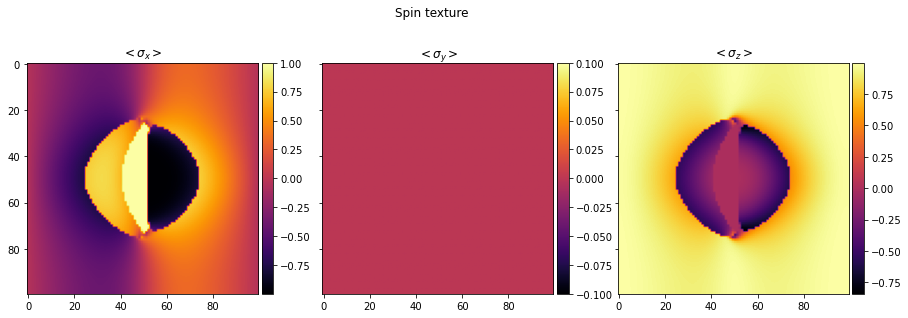

In [198]:
fig,ax=plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(15,5))

plt.suptitle("Spin texture")

im0 = ax[0].imshow(SX,cmap='inferno')
ax[0].set_title(r"$<\sigma_x>$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(SY,cmap='inferno')
ax[1].set_title(r"$<\sigma_y>$")

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[2].imshow(SZ,cmap='inferno')
ax[2].set_title(r"$<\sigma_z>$")

divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.show()

These results aren't to be blindly trusted, since tunnelling pushes the boundary states beyond zero energy. 

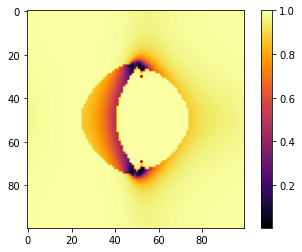

In [199]:
plt.imshow(SX**2+SZ**2,cmap="inferno")
plt.colorbar()
plt.show()

# Tunnelling strength dependence ($r$)

Look at how the spin $\sigma_x$ and $\sigma_z$ of the the boundary state varies as a function of tunnelling strength.

We'll look at the state at $k_x=k_z=0$. First, this is how the spectrum changes as a function of $r$:

In [504]:
size=100

rs = np.linspace(0,2.3,5)
es_5 = np.zeros((100,200,5))
vs_5 = np.zeros((200,200,100,5),dtype=complex)

for i in range(5):
    r = rs[i]
    ks_z,es_z,vs_z=ws.SpectrumZ(size=size,kx=0,t=1,g=0,mu=-4,r=r,bulk=0)
    vs_5[:,:,:,i] = vs_z
    es_5[:,:,i] = es_z

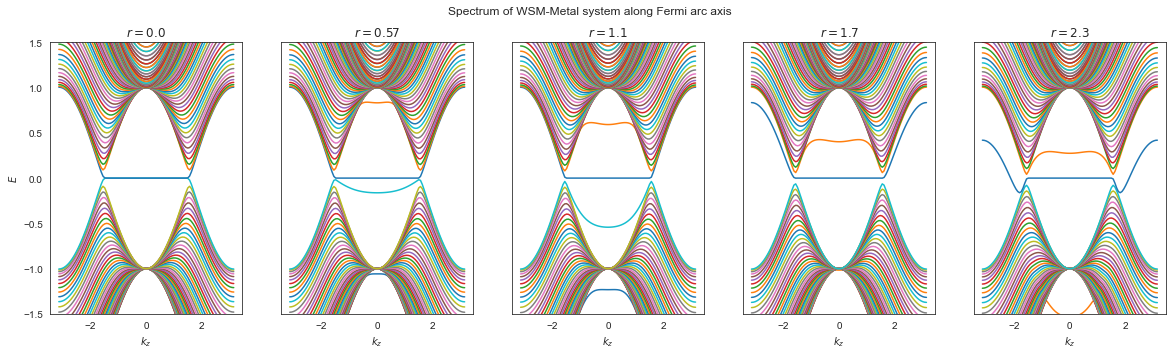

In [507]:
fig,ax=plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(20,5))

plt.suptitle("Spectrum of WSM-Metal system along Fermi arc axis")

for i in range(5):
    ax[i].plot(ks_z,es_5[:,:,i])
#     ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-1.5,1.5)
    ax[i].set_xlabel(r"$k_z$")
    ax[i].set_title(r"$r = {:.2}$".format(rs[i]))
ax[0].set_ylabel(r"$E$")

plt.show()

Look at the state at $E=0$ (`np.argmin(np.abs(es))`), which we expect it not to change with $r$:

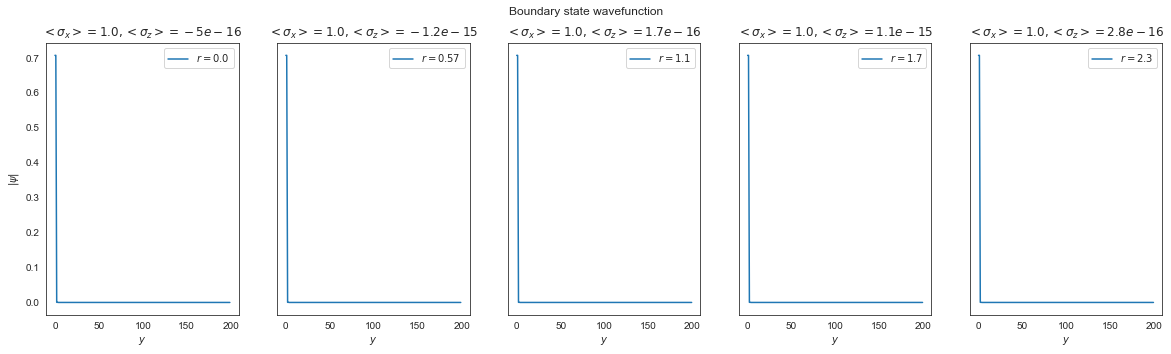

In [292]:
fig,ax=plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(20,5))

plt.suptitle("Boundary state wavefunction")

for i in range(5):
    bdry_idx = np.argmin(np.abs(es_5[50,:,i]))
    if i==0:
        bdry_idx+=1 # to get correct localization
        ax[i].set_ylabel(r"$|\psi|$")
    state = vs_5[:,bdry_idx,50,i]
    spinX,spinY,spinZ=ws.Spin(state,size,sample=0) # get spin
    ax[i].set_title(r"$ <\sigma_x>={:.2},  <\sigma_z>={:.2}$".format(np.real(spinX),np.real(spinZ)))
    ax[i].plot(np.arange(2*size),np.abs(state),label=r"$r={:.2}$".format(rs[i]))
    ax[i].set_xlabel(r"$y$")
    ax[i].legend()
plt.show()

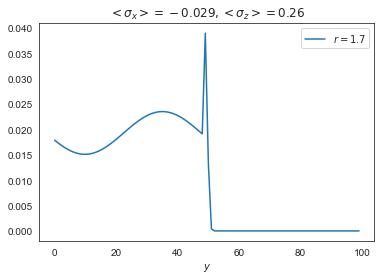

In [527]:
k=25
i=3
e=0
bdry_idx = np.argmin(np.abs(es_5[k,:,i]-e))
state = vs_5[:,bdry_idx-1,k,i]
spinX,spinY,spinZ=ws.Spin(state,size,sample=0) # get spin
plt.title(r"$ <\sigma_x>={:.2},  <\sigma_z>={:.2}$".format(np.real(spinX),np.real(spinZ)))
plt.plot(np.arange(100),ws.SumOverSpins(state),label=r"$r={:.2}$".format(rs[i]))
plt.xlabel(r"$y$")
plt.legend()
plt.show()

In [528]:
sx,sy,sz=ws.SpinRealSpace(ws.Normalize(state),100)

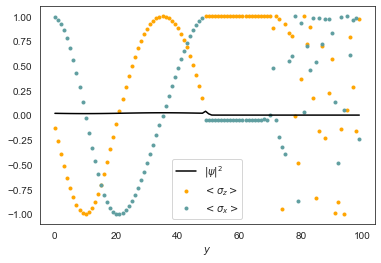

In [529]:
ys = np.arange(100)

plt.figure()
plt.scatter(ys,sz,c='orange',marker='.',label=r"$<\sigma_z>$")
plt.scatter(ys,sx,c='cadetblue',marker='.',label=r"$<\sigma_x>$")
plt.plot(ys,ws.SumOverSpins(state),c='k',label=r"$|\psi|^2$")
# plt.scatter(np.arange(50),sx**2+sz**2,c='k',marker='.',label=r"$<\sigma_x>$")
# plt.axvline(x=49)
plt.xlabel(r"$y$")
plt.legend()
plt.show()
# plt.scatter(np.arange(size),sx**2+sz**2)